# Class 31: Confidence Intervals

1. respond in zoom chat: iced vs. hot coffee (or tea, or beverages in general). one all year? seasonal?
1. log onto prismia chat
1. respond on prismia with any questions you have about the course material so far:
 - what are you confused about?
 - wht do you want to know about about?
 - what thing keeps tripping you up on assignments?

## Admin

## Confidence intervals

In [1]:
# %load http://drsmb.co/310
# %load http://drsmb.co/310
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn import cluster
from sklearn import svm
from sklearn import tree
from sklearn import model_selection

<ErrorbarContainer object of 3 artists>

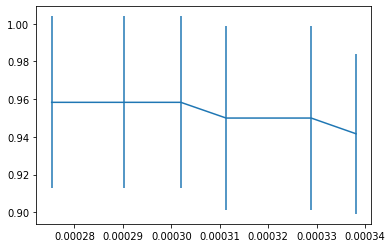

In [2]:
iris_X , iris_y = datasets.load_iris(return_X_y= True)
iris_X_train, iris_X_test, iris_y_train, iris_y_test = model_selection.train_test_split(
            iris_X , iris_y,test_size =.2, random_state=0)

param_grid = {'kernel':['linear','rbf'], 'C':[.5, 1, 10]}
svm_clf = svm.SVC(kernel='linear')
svm_opt =model_selection.GridSearchCV(svm_clf,param_grid,)
svm_opt.fit(iris_X_train, iris_y_train)

df_svm = pd.DataFrame(svm_opt.cv_results_)
df_svm.sort_values(by='mean_score_time',inplace=True)
plt.errorbar(df_svm['mean_score_time'],df_svm['mean_test_score'], df_svm['std_test_score'])

In [3]:
iris_X.shape

(150, 4)

training

In [4]:
150*.8

120.0

In [5]:
iris_X_train.shape

(120, 4)

Cross validation tests

In [6]:
120*.2

24.0

In [7]:
iris_X_test

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.5, 1.3, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 2.8, 4. , 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [4.9, 3.6, 1.4, 0.1],
       [6. , 2.9, 4.5, 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.6, 2.8, 4.9, 2. ],
       [5.6, 3. , 4.5, 1.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [6.2, 2.8, 4.8, 1.8],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [6.2, 2.9, 4.3, 1.3],
       [5. , 2.3, 3.3, 1. ],
       [5. , 3.4, 1.6, 0.4]])

In [8]:
svm_opt.score(iris_X_test,iris_y_test)

1.0

In [9]:
# %load http://drsmb.co/310
def classification_confint(acc, n):
    '''
    Compute the 95% confidence interval for a classification problem.
      acc -- classification accuracy
      n   -- number of observations used to compute the accuracy
    Returns a tuple (lb,ub)
    '''
    interval = 1.96*np.sqrt(acc*(1-acc)/n)
    lb = max(0, acc - interval)
    ub = min(1.0, acc + interval)
    return (lb,ub)

In [10]:
classification_confint(svm_opt.score(iris_X_test,iris_y_test),len(iris_y_test))

(1.0, 1.0)

In [11]:
classification_confint(.9999,len(iris_y_test))

(0.9963217248848085, 1.0)

In [12]:
classification_confint(.85,len(iris_y_test))

(0.722223632858028, 0.9777763671419719)

In [13]:
classification_confint(.93,len(iris_y_test))

(0.8386968127609995, 1.0)

In [14]:
classification_confint(.85,50)

(0.7510248516040516, 0.9489751483959483)

In [15]:
classification_confint(.93,50)

(0.8592768552735387, 1.0)

In [16]:
df_svm

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.000581,0.000079,0.000275,0.000034,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.958333,0.958333,1.000000,1.0,0.875,0.958333,0.045644,1
0,0.000594,0.000081,0.000290,0.000026,0.5,linear,"{'C': 0.5, 'kernel': 'linear'}",0.958333,0.958333,1.000000,1.0,0.875,0.958333,0.045644,1
4,0.000607,0.000015,0.000302,0.000010,10,linear,"{'C': 10, 'kernel': 'linear'}",0.958333,0.958333,1.000000,1.0,0.875,0.958333,0.045644,1
2,0.000563,0.000041,0.000311,0.000027,1,linear,"{'C': 1, 'kernel': 'linear'}",0.958333,0.916667,1.000000,1.0,0.875,0.950000,0.048591,4
5,0.000661,0.000034,0.000329,0.000008,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.958333,0.916667,1.000000,1.0,0.875,0.950000,0.048591,4
1,0.000732,0.000052,0.000338,0.000012,0.5,rbf,"{'C': 0.5, 'kernel': 'rbf'}",0.916667,0.958333,0.958333,1.0,0.875,0.941667,0.042492,6


## Try it yourself


````{dropdown} How many samples would it take for accuracies of 85% and 93% to be statistically significantly different for 95% confidence interval?

the result is a tuple, so we can use indexing to select one element
```{code-cell} ipython3
classification_confint(.85,50)[0]
```

then compare the upper bound for the lower accuracy to the lower bound of the upper to see if there's overlap

```{code-cell} ipython3
classification_confint(.85,50)[1] < classification_confint(.93,50)[0]
```

Then we can make that a lambda and use a while loop to find the answer.

```{code-cell} ipython3
N = 30
sig_df = lambda N: classification_confint(.85,N)[1] < classification_confint(.93,N)[0]

while not(sig_df(N)):
    N+=1

print(N)
```
````